In [1]:
import allesfitter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii
from astropy.timeseries import LombScargle

import scipy
from scipy.fft import fftfreq
from scipy.fft import fft

import allesfitter

import lightkurve as lk
import os

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
#pip install -U allesfitter

# 1) Downloading lightcurve

SearchResult containing 21 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 14 2019   SPOC     120   233547261      0.0
  1 TESS Sector 15 2019   SPOC     120   233547261      0.0
  2 TESS Sector 16 2019   SPOC     120   233547261      0.0
  3 TESS Sector 17 2019   SPOC     120   233547261      0.0
  4 TESS Sector 18 2019   SPOC     120   233547261      0.0
  5 TESS Sector 19 2019   SPOC     120   233547261      0.0
  6 TESS Sector 20 2019   SPOC     120   233547261      0.0
  7 TESS Sector 21 2020   SPOC     120   233547261      0.0
  8 TESS Sector 22 2020   SPOC     120   233547261      0.0
  9 TESS Sector 23 2020   SPOC     120   233547261      0.0
 10 TESS Sector 24 2020   SPOC     120   233547261      0.0
 11 TESS Sector 25 2020   SPOC     120   233547261      0.0
 12 TESS Sector 26 2020   SPOC     120   233547261      0

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

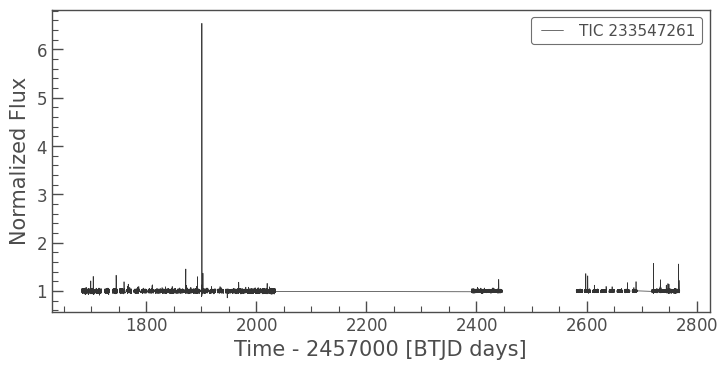

In [47]:
#search flare
search_result = lk.search_lightcurve('TIC 233547261', exptime = 120)
print(search_result)

#plot flare
#lc = search_result[0].download()
lc = search_result.download_all()
lc = lc.stitch()
lc.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

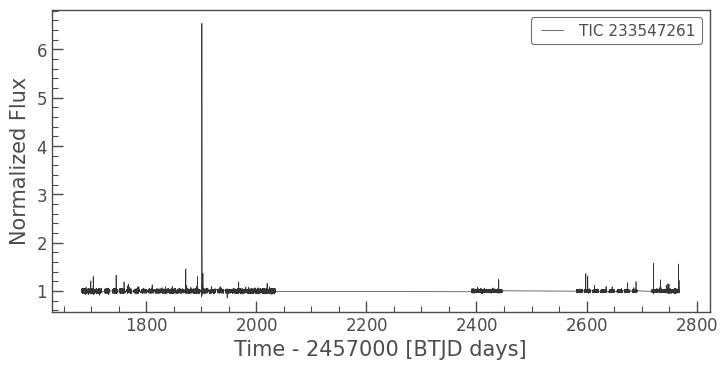

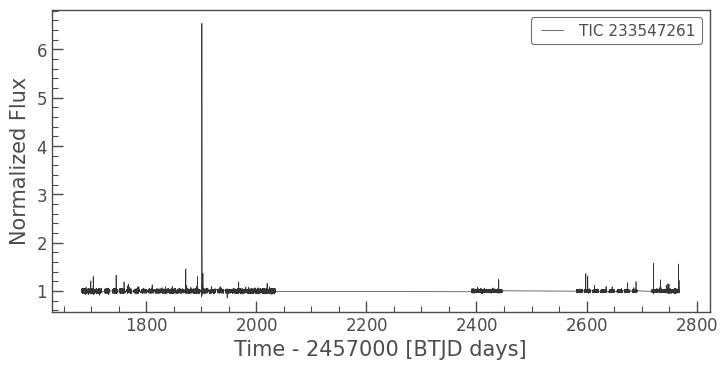

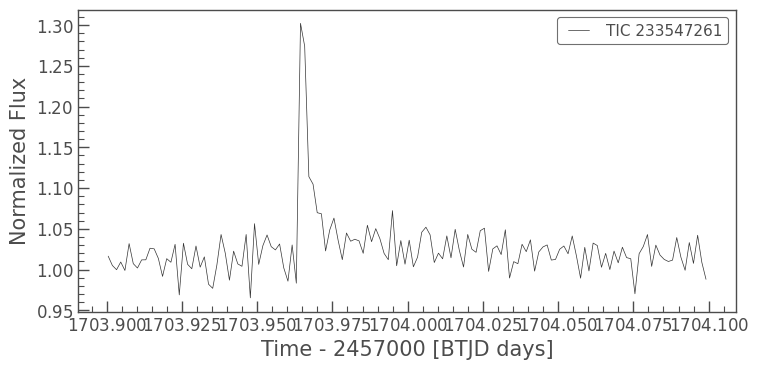

In [43]:
#remove nan values
lc1 = lc.remove_nans()
lc1.plot()

#normalize
lc2 = lc1.normalize()
lc2.plot()       #actual flare normalized plot

#saving the plot by creating folder
folder = "lightkurve_plots"
#if not os.path.exists(folder):
#    os.makedirs(folder)
#    plt.savefig("./lightkurve_plots/flare_1403938")

#to create fit file
#lc.to_fits(path='./TIC_233547261/TIC_233547261.fits', overwrite=True)

#to truncate values
lc3 = lc2.truncate(before = [1703.9], after = [1704.1])
lc3.plot()
#lc3.scatter()
#plt.savefig("./lightkurve_plots/flare_233547261_zoomed")
#lc3.to_csv(path_or_buf = './allesfit/TIC_233547261.csv',overwrite=True)

# 2) Running nested sampling

In [27]:
#one flare

allesfitter.show_initial_guess('allesfit')
allesfitter.ns_fit('allesfit')
allesfitter.ns_output('allesfit')


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_233547261 ---> ln_err_flux_TIC_233547261. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632


Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_233547261']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_233547261', 'hybrid_spline'),
             ('error_flux_TIC_233547261', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
            

100%|██████████| 6/6 [00:00<00:00, 291.55it/s]


Plotting individual transits for companion b and instrument TIC_233547261...
Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_233547261']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_233547261', 'hybrid_spline'),
             ('error_flux_TIC_233547261', 'sample'),
        


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_233547261 ---> ln_err_flux_TIC_233547261. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632



Running on 7 CPUs.


23153it [04:07, 93.65it/s, batch: 6 | bound: 22 | nc: 24 | ncall: 520740 | eff(%):  4.446 | loglstar: 620.440 < 626.044 < 624.880 | logz: 601.375 +/-  0.138 | stop:  0.881]            



Time taken to run 'dynesty' (in dynamic mode) is 0.07 hours



! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_233547261 ---> ln_err_flux_TIC_233547261. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632


Filling the Basement


allesfitter version
---------------------
v1.2.10
OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_233547261']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_233547261', 'hybrid_spline'),
             ('error_flux_TIC_233547261', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
            

100%|██████████| 6/6 [00:00<00:00, 12.20it/s]


Plotting individual transits for companion b and instrument TIC_233547261...

Results:
----------
log(Z) = 601.3761602520043 +- 0.1275973738619008
Nr. of posterior samples: 23153
Deriving eclipse depths (and more) from the model curves for companion b and instrument TIC_233547261...

No values available to be derived.

Performing diagnostic tests on the fit's residuals...

Anderson-Darling Test
---------------------
This tests the null hypothesis that the residuals follows a normal distribution.
Test statistic		 3.2233204709324355
Critical values		 [0.566 0.644 0.773 0.902 1.073]
Significance levels	 [0.15  0.1   0.05  0.025 0.01 ]
Does the null hypotheses hold at a significance level of...
... 0.15 		 False
... 0.1 		 False
... 0.05 		 False
... 0.025 		 False
... 0.01 		 False
The null hypothesis is rejected at some significance levels.
In simple words: there might still be some structure in your residuals.


Augmented Dickey-Fuller Test
----------------------------
This tests the nu

'"Strange women lying in ponds distributing swords is no basis for a system of government. Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony." – Dennis the Peasant, Monty Python and the Holy Grail\n'

# 3) Run residuals 

In [28]:
#     ::: your settings
datadir = 'allesfit' #change this to what you need
inst = 'TIC_233547261' #change this to what you need
key = 'flux' #change this to what you need


#     ::: initialize the allesclass
alles = allesfitter.allesclass(datadir);


#     ::: load the data (and the correct error bars)
time = alles.data[inst]['time']
flux = alles.data[inst][key]
flux_err = alles.data[inst]['err_scales_'+key] * alles.posterior_params_median['err_'+key+'_'+inst]


#     ::: load the median baseline, median lightcurve model, and median residuals
baseline = alles.get_posterior_median_baseline(inst, key)
model = alles.get_posterior_median_model(inst, key)
residuals = alles.get_posterior_median_residuals(inst, key)


#     ::: save everything to a file for your collaborators
X = np.column_stack((time, flux, flux_err,model, residuals)) #detrended_flux, model, residuals))
np.savetxt('residual_TIC_233547261.csv', X, delimiter=',')

Filling the Basement

OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_233547261']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_233547261', 'hybrid_spline'),
             ('error_flux_TIC_233547261', 'sample'),
             ('N_flares', '1'),
             ('automatically set:', ''),
             ('time_format', 'BJD_TDB'),
             ('inst_rv


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_233547261 ---> ln_err_flux_TIC_233547261. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632

! WARNING:
 No NS nor MCMC derived file detected.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/__init__.py, line: 140


# 4) Opening residual file

In [29]:
colnames = ("time" , "flux" , "flux_err" , "model" ,"residuals")
file = ascii.read("residual_TIC_233547261.csv", Reader=ascii.NoHeader, names=colnames)
#print(file['flux'][0])

In [30]:
# max point position of the flare

maximum = np.max(file["flux"])
print(maximum) # to be put in csv

1.4562598


In [31]:
#for finding the index of maximum position of flare
arr = file["flux"]
result = np.where(arr == maximum)
print(result)
print(file["time"][96])

(array([96]),)
1872.133647016106


In [32]:
#for finding the x value for the maximum point of flare
max_x = file["time"][96]
time = file["time"]
print(max_x)

1872.133647016106


In [33]:
#time conversion to minutes
from astropy import units as u
time_in_days = (1/100)*u.day
time_in_days.to(u.min)
time_in_days = time*u.day
time_min = time_in_days.to(u.min).value


max_time_min = time_min[61]
print(max_time_min)

2695802.452111405


In [34]:
time_in_days = (1/100)*u.day
print(time_in_days)

0.01 d


In [16]:
time_in_days.to(u.min)

<Quantity 14.4 min>

In [17]:
time_in_days = time*u.day
#print(time_in_days)

In [18]:
time_min = time_in_days.to(u.min).value
#print(time_min)

# 5) Plots (data, residuals, residuals zoom, and Lomb Scargle periodogram all in one plot)

1) For the flare region

a) time in min

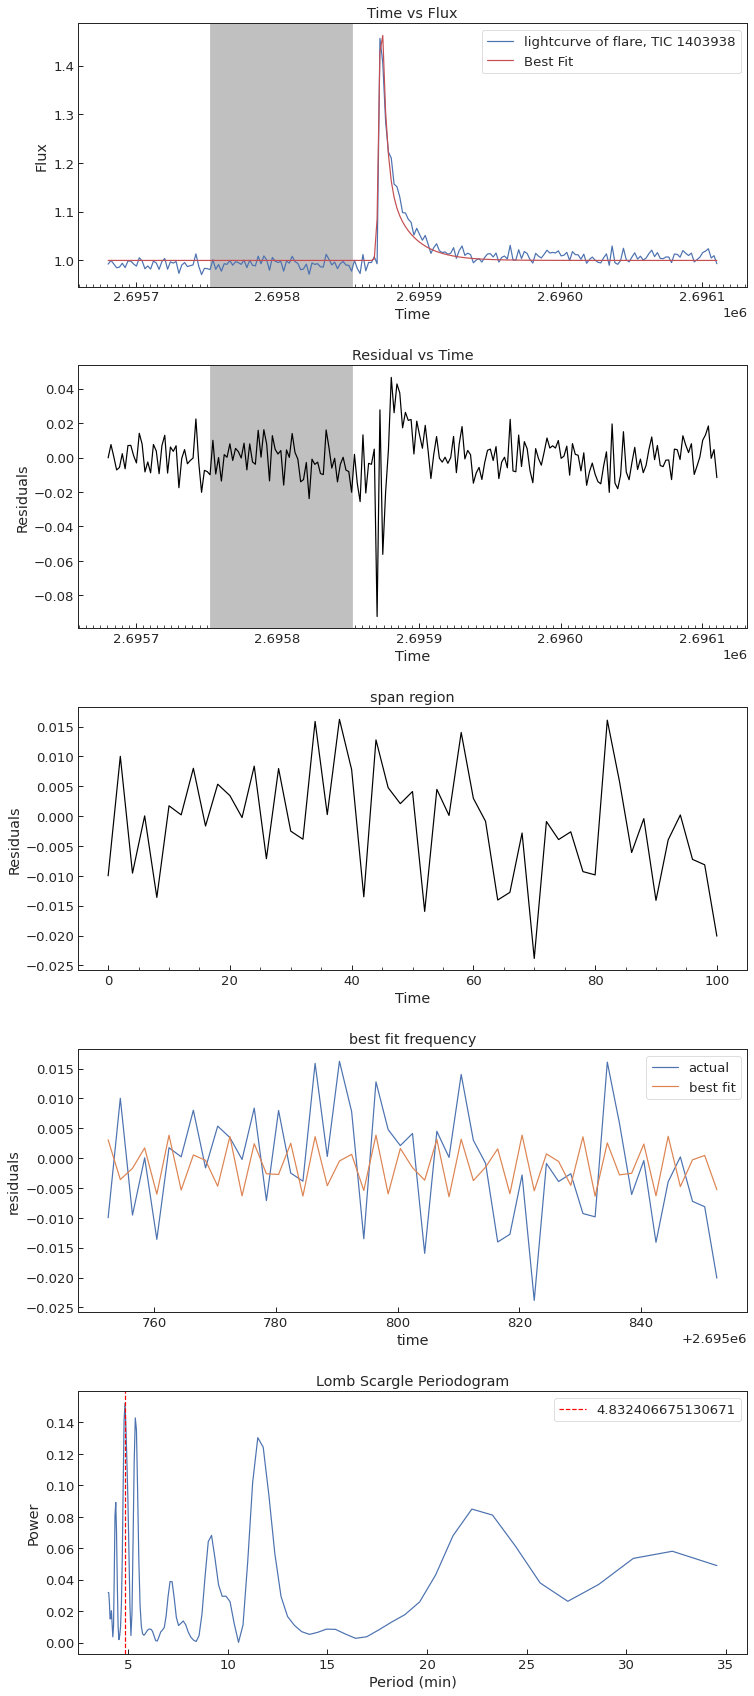

In [38]:
time = file["time"]

#time conversion to minutes
from astropy import units as u
time_in_days = (1/100)*u.day
time_in_days.to(u.min)
time_days = time*u.day
time_min = time_days.to(u.min).value


flux = file["flux"]
residuals = file ["residuals"]
model = file["model"]

#fot thr flare part
t_start = max_time_min - 50 #start at -1hr from max point
t_end = max_time_min + 50   #end at +3 hr from max point

#plots side by side
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (12,30))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax3.xaxis.set_minor_locator(MultipleLocator(5))
#ax4.xaxis.set_minor_locator(MultipleLocator(5))
ax5.xaxis.set_minor_locator(MultipleLocator(5))


#1) time vs flux
ax1.title.set_text("Time vs Flux")
ax1.plot(time_min, flux, 'b-' , label = "lightcurve of flare, TIC 1403938")
ax1.plot(time_min,model, "r" , label = "Best Fit")
ax1.axvspan(t_start,t_end, color = 'silver')
ax1.set_xlabel("Time")
ax1.set_ylabel("Flux")
ax1.legend()

#2) plot of time vs residuals with span
ax2.axvspan(t_start,t_end, color = 'silver')
ind = np.where((time_min >= t_start) & (time_min <= t_end))
ax2.title.set_text("Residual vs Time")
ax2.plot(time_min, residuals, 'black')
ax2.set_xlabel("Time")
ax2.set_ylabel("Residuals")


#3) plot of span region
ind = np.where((time_min >= t_start) & (time_min <= t_end))
time_2 = time_min[ind]
time_array = time_2 - time_2[0]

residuals_2 = residuals[ind]
ax3.title.set_text("span region")
ax3.plot(time_array,residuals_2, 'black')
ax3.set_xlabel("Time")
ax3.set_ylabel("Residuals")


#4) Best frequency
frequency, power = LombScargle(time_2, residuals_2).autopower(nyquist_factor = 1)
best_frequency = frequency[np.argmax(power)]
t_fit = time_2
ls = LombScargle(time_2, residuals_2)
y_fit = ls.model(t_fit, best_frequency)
ax4.plot(time_2,residuals_2, label = "actual")
ax4.plot(t_fit, y_fit, label = "best fit")
ax4.title.set_text("best fit frequency")
ax4.set_xlabel("time")
ax4.set_ylabel("residuals")
ax4.legend()



#5) lomb scargle applied
min_period = 4  #for having in minutes
#min_period =(4/60/24.)in days; 4 min converted into days; determined by Nyquist frequency because of TESS 2 min cadence

max_period = 2 * 0.012 *1440 #for converting into min multiplied by 1440
#max_period = 2 * FWHM #in days; twice the FWHM of the flare to automatise it (edited) 

#And then you just convert it and feed it into autopower
minimum_frequency=1./max_period
maximum_frequency=1./min_period
frequency, power = LombScargle(time_2, residuals_2).autopower(minimum_frequency=minimum_frequency, maximum_frequency=maximum_frequency)
#frequency, power = LombScargle(time_2, residuals_2).autopower(nyquist_factor = 1)#(maximum_frequency=100)
#ax5.plot(frequency,np.abs(power))
ax5.plot(1/frequency,np.abs(power))
ax5.title.set_text("Lomb Scargle Periodogram")
ax5.set_xlabel("Period (min)")
ax5.set_ylabel("Power")

# marking lines on lomb scargle plot
max_power = max(power)  # Find the maximum y value
max_period = 1/frequency[power.argmax()] #Find the x value corresponding to the max y value
plt.axvline(x=max_period, color = "red", linestyle = "--", label = max_period)
plt.legend()

plt.subplots_adjust(hspace=0.3)